In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
architecture = 'cnn'
branches = 3

In [3]:
df = pd.read_csv('results/mnist-{}-B{}-test.csv'.format(architecture, branches), header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8
0,NaN,acc_2,acc_4,acc_8,after_mean_acc,before_mean_acc,loss_2,loss_4,loss_8
1,0.0,0.9713,0.977,0.9668,0.9823,0.9829,0.09279309,0.07164204,0.11336382
2,NaN,acc_2,acc_5,acc_7,after_mean_acc,before_mean_acc,loss_2,loss_5,loss_7
3,0.0,0.9713,0.9796,0.9727,0.983,0.9831,0.09279309,0.072589055,0.091366634
4,NaN,acc_1,acc_6,acc_8,after_mean_acc,before_mean_acc,loss_1,loss_6,loss_8
5,0.0,0.9721,0.9774,0.9668,0.9835,0.984,0.08363106,0.06777152,0.11336382
6,NaN,acc_2,acc_6,acc_7,after_mean_acc,before_mean_acc,loss_2,loss_6,loss_7
7,0.0,0.9713,0.9774,0.9727,0.9831,0.984,0.09279309,0.06777152,0.091366634
8,NaN,acc_4,acc_6,acc_7,after_mean_acc,before_mean_acc,loss_4,loss_6,loss_7
9,0.0,0.977,0.9774,0.9727,0.9834,0.9839,0.07164204,0.06777152,0.091366634


In [5]:
avg_acc = df.iloc[range(1, len(df.index)+1, 2), branches+2].astype('float32').mean()
print(avg_acc)

0.9835125


In [6]:
val_acc = []
for i in range(8):
    df = pd.read_csv('results/mnist-{}_{}-train.csv'.format(architecture, i+1))
    val_acc.append(df.iloc[-1]['val_acc'])
baseline = np.mean(val_acc)
print(baseline)

0.9730999991297722


In [7]:
results = {}
results_std = {}
for frac in [0, 0.25, 0.5, 0.75, 1]:
    val_acc = []
    for i in range(4):
        df = pd.read_csv('results/vb-mnist-{}-B{}-S{:.2f}_{}-train.csv'.format(architecture, branches, frac, i+1))
        val_acc.append(df.iloc[-1]['val_acc'])
    print(frac, val_acc)
    results[frac] = np.mean(val_acc)
    results_std[frac] = np.std(val_acc)

0 [0.9837999939918518, 0.9822999835014344, 0.9817000031471252, 0.982200026512146]
0.25 [0.9829999804496764, 0.9844999909400941, 0.9824000000953674, 0.9812999963760376]
0.5 [0.981599986553192, 0.9825999736785888, 0.9819999933242798, 0.9804999828338624]
0.75 [0.9804000258445741, 0.9830999970436096, 0.979099988937378, 0.9797000288963318]
1 [0.9733999967575072, 0.9799000024795532, 0.9783999919891356, 0.9787999987602234]


In [8]:
results

{0: 0.9825000017881393,
 0.25: 0.9827999919652939,
 0.5: 0.9816749840974808,
 0.75: 0.9805750101804733,
 1: 0.9776249974966049}

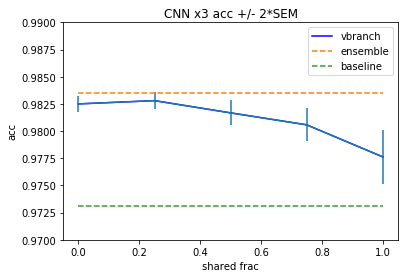

In [9]:
results_list = list(results.items())
results_list.sort()
results_list = np.array(results_list)

plt.plot(results_list[:, 0], results_list[:,1], label='vbranch', color='blue')
trials = 4
error = np.sort(np.array(list(results_std.items())), 0)[:, 1] / np.sqrt(trials)
plt.errorbar(results_list[:, 0], results_list[:,1], error*2)

plt.plot(results_list[:, 0], [avg_acc]*len(results_list), label='ensemble', linestyle='--')
plt.plot(results_list[:, 0], [baseline]*len(results_list), label='baseline', linestyle='--')

if architecture == 'fcn':
    plt.ylim(0.94, 0.96)
else:
    plt.ylim(0.97, 0.99)

plt.legend()
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title('{} x{} acc +/- 2*SEM'.format(architecture.upper(), branches))

plt.savefig('figs/{}-{}-results.png'.format(architecture, branches))
plt.show()

In [12]:
import os
for b in range(2, 5):
    B_name = 'B{}'.format(b)
    for s in [0, 0.25, 0.5, 0.75, 1]:
        S_name = 'S{:.2f}'.format(s)
        path = os.path.join('results/vb-mnist-fcn', B_name, S_name)
        if not os.path.isdir(path):
            os.system('mkdir -p ' + path)
        for i in range(4):
            csv_path = 'results/vb-mnist-fcn-{}-{}_{}-train.csv'.format(B_name, S_name, i+1)
            os.system('mv {} {}'.format(csv_path, os.path.join(path, 'train_{}.csv'.format(i+1))))

In [16]:
path = 'results/mnist-cnn'
os.system('mkdir ' + path)
for i in range(8):
    csv_path = 'results/mnist-cnn_{}-train.csv'.format(i+1)
    os.system('mv {} {}'.format(csv_path, os.path.join(path, 'train_{}.csv'.format(i+1))))